In [35]:
%load_ext autoreload
%autoreload 2

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [37]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [38]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [39]:
from llm_toolkit.logical_reasoning_utils import *

In [40]:
model_name = "Llama3.1-70B-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [41]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   text                                                                          3000 non-null   object
 1   label                                                                         3000 non-null   object
 2   title                                                                         3000 non-null   object
 3   puzzle                                                                        3000 non-null   object
 4   truth                                                                         3000 non-null   object
 5   shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf                 3000 non-null   object
 6   shenzhi-wang/Llama3.1-70B-Chinese-Chat/c

In [42]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00',
 'shenzhi-wang/Llama3.1-

In [43]:
perf_df = get_metrics_df(df)
perf_df

columns: ['shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return perf_df


epoch                      model  \
0     0.0  Llama3.1-70B-Chinese-Chat   
1     0.2  Llama3.1-70B-Chinese-Chat   
2     0.4  Llama3.1-70B-Chinese-Chat   
3     0.6  Llama3.1-70B-Chinese-Chat   
4     0.8  Llama3.1-70B-Chinese-Chat   
5     1.0  Llama3.1-70B-Chinese-Chat   
6     1.2  Llama3.1-70B-Chinese-Chat   
7     1.4  Llama3.1-70B-Chinese-Chat   
8     1.6  Llama3.1-70B-Chinese-Chat   
9     1.8  Llama3.1-70B-Chinese-Chat   
10    2.0  Llama3.1-70B-Chinese-Chat   

                                                  run  accuracy  precision  \
0   shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.b...  0.763667   0.780665   
1   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.778000   0.814871   
2   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.730667   0.814578   
3   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.719333   0.821357   
4   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.756333   0.826790   
5   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.796333   0.824897   
6   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.732667   0.826535   
7   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.755667   0.825899   
8   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.757000   0.826446   
9   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.754667   0.827772   
10  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.749667   0.828231   

      recall        f1  ratio_valid_classifications  
0   0.763667  0.752581                     0.009667  
1   0.778000  0.791081                     0.999667  
2   0.730667  0.762472                     1.000000  
3   0.719333  0.756070                     1.000000  
4   0.756333  0.781516                     1.000000  
5   0.796333  0.807687                     1.000000  
6   0.732667  0.764442                     1.000000  
7   0.755667  0.782041                     1.000000  
8   0.757000  0.783450                     1.000000  
9   0.754667  0.782358                     1.000000  
10  0.749667  0.779195                     1.000000

0.0: shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf
0.2: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf
0.4: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf
0.6: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf
0.8: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf
1.0: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf
1.2: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf
1.4: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf
1.6: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf
1.8: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf
2.0: shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf


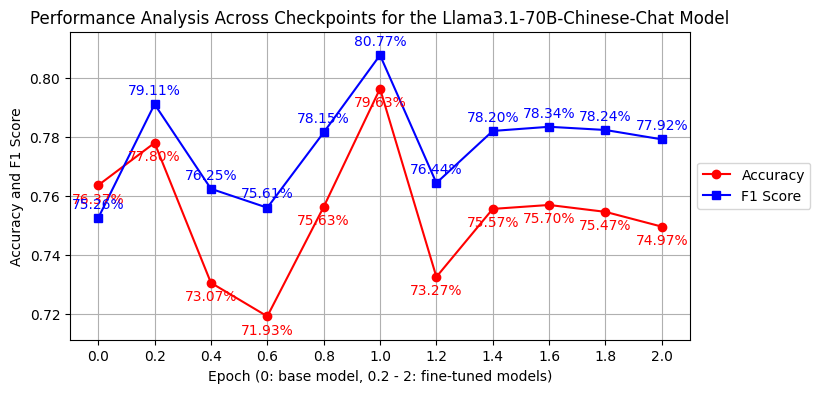

In [44]:
plot_metrics(perf_df, model_name, offset=0.0035)

In [45]:
perf_df.to_csv(metrics_csv, index=False)

In [46]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-20', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-30']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return perf_df


shots                      model  \
0     0  Llama3.1-70B-Chinese-Chat   
1     5  Llama3.1-70B-Chinese-Chat   
2    10  Llama3.1-70B-Chinese-Chat   
3    20  Llama3.1-70B-Chinese-Chat   
4    30  Llama3.1-70B-Chinese-Chat   

                                               run  accuracy  precision  \
0  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00  0.763667   0.780665   
1  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05  0.753667   0.772126   
2  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10  0.754000   0.772948   
3  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-20  0.738000   0.756694   
4  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-30  0.758000   0.773154   

     recall        f1  ratio_valid_classifications  
0  0.763667  0.752581                     0.009667  
1  0.753667  0.754503                     0.790000  
2  0.754000  0.756682                     0.832667  
3  0.738000  0.734896                     0.819000  
4  0.758000  0.756501                     0.548000

0: shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00
5: shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05
10: shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10
20: shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-20
30: shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-30


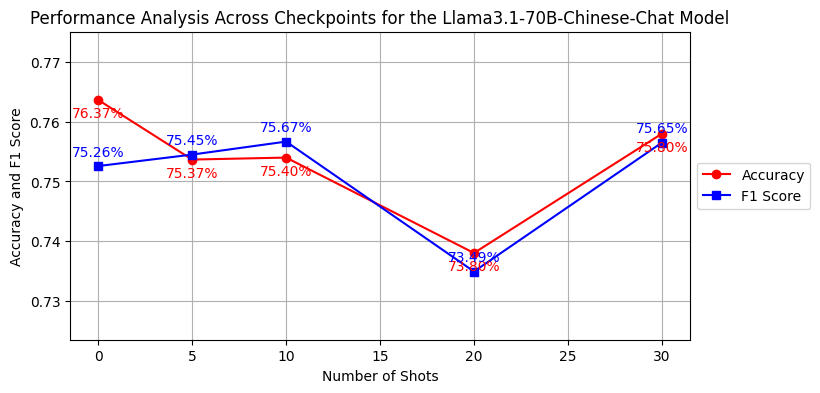

In [47]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [48]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf
不是。      1961
是。        895
问法错误。      73
回答正确。      26
不重要        20
不重要。       15
回答正确        5
是           4
是男孩。        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38382 (\N{CJK UNIFIED IDEOGRAPH-95EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

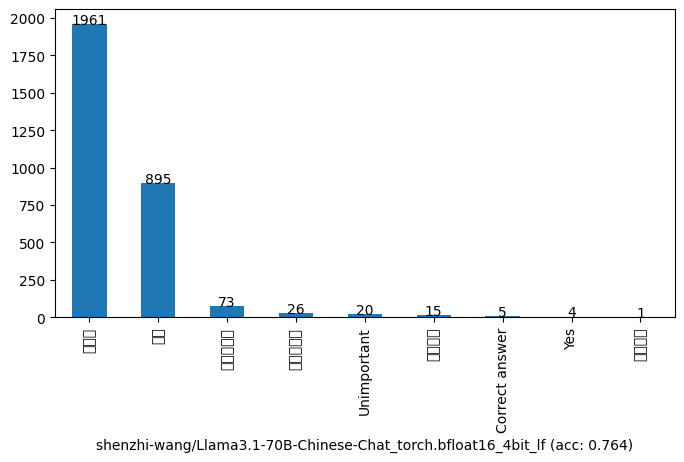

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf
不是      1429
是       1180
不重要      339
回答正确      37
问法错误      14
物品         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


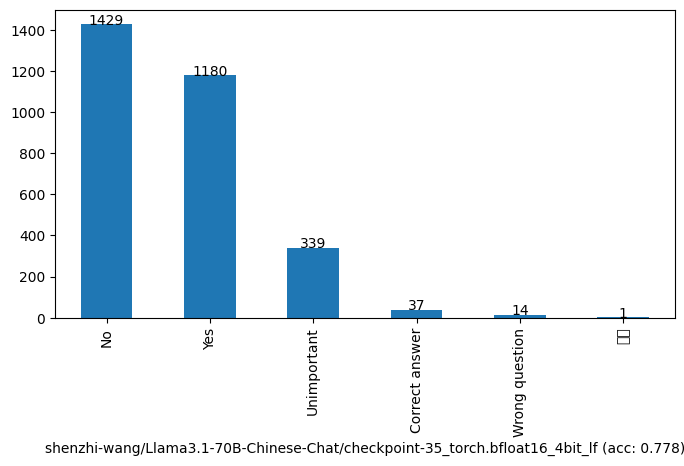

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf
不是      1308
是       1099
不重要      512
问法错误      46
回答正确      35
Name: count, dtype: int64


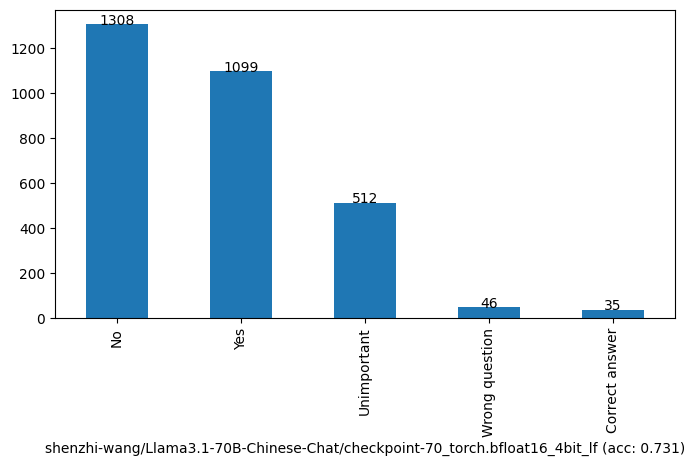

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf
不是      1187
是       1152
不重要      562
问法错误      67
回答正确      32
Name: count, dtype: int64


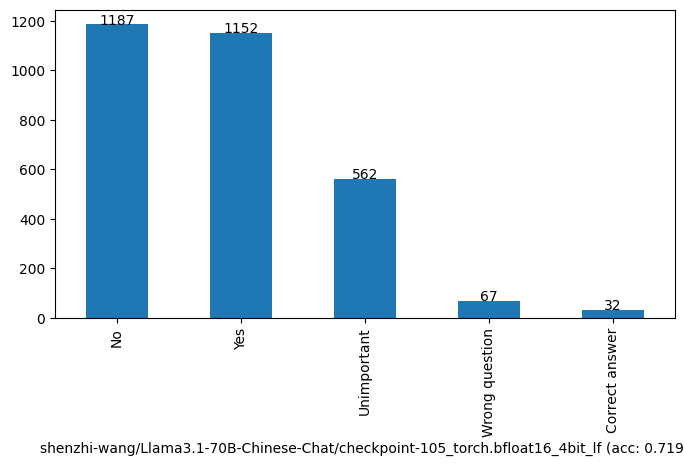

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf
是       1245
不是      1237
不重要      446
问法错误      43
回答正确      29
Name: count, dtype: int64


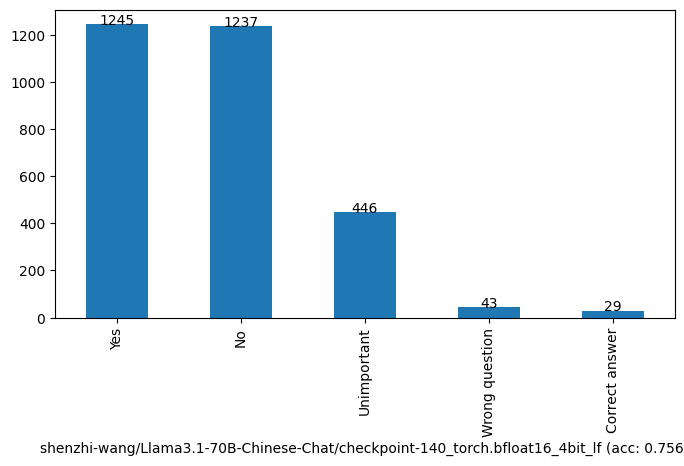

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf
不是      1443
是       1188
不重要      283
问法错误      50
回答正确      36
Name: count, dtype: int64


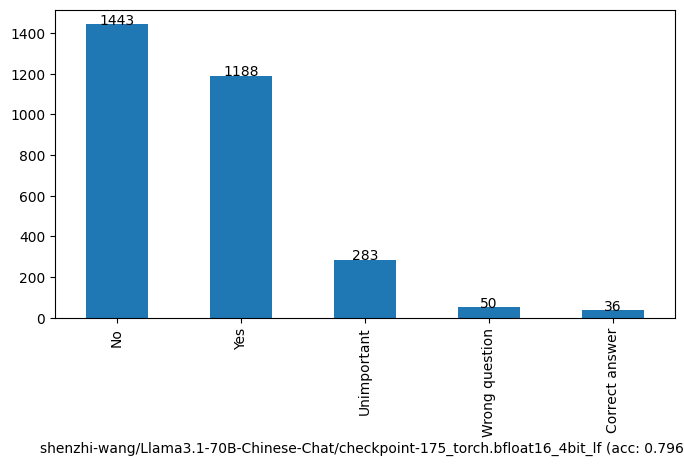

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf
是       1246
不是      1137
不重要      514
问法错误      68
回答正确      35
Name: count, dtype: int64


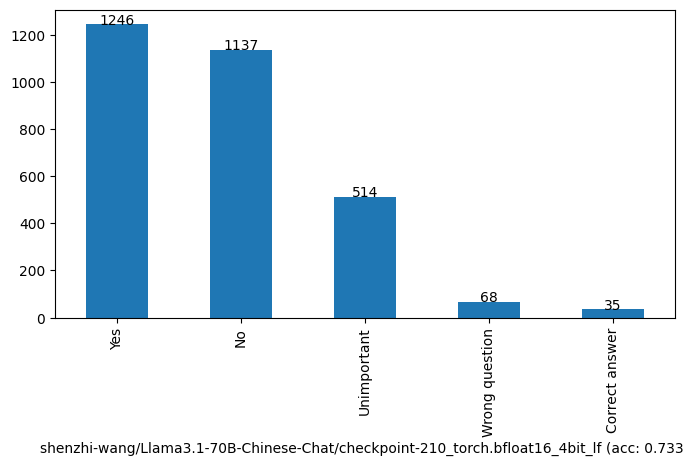

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf
不是      1312
是       1162
不重要      463
问法错误      33
回答正确      30
Name: count, dtype: int64


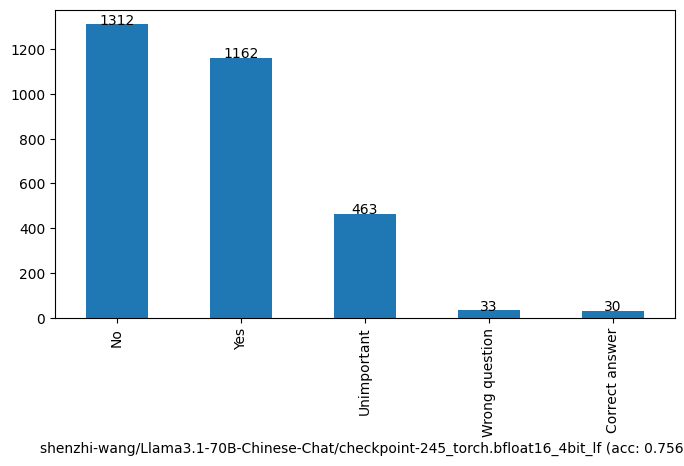

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf
不是      1313
是       1161
不重要      449
问法错误      46
回答正确      31
Name: count, dtype: int64


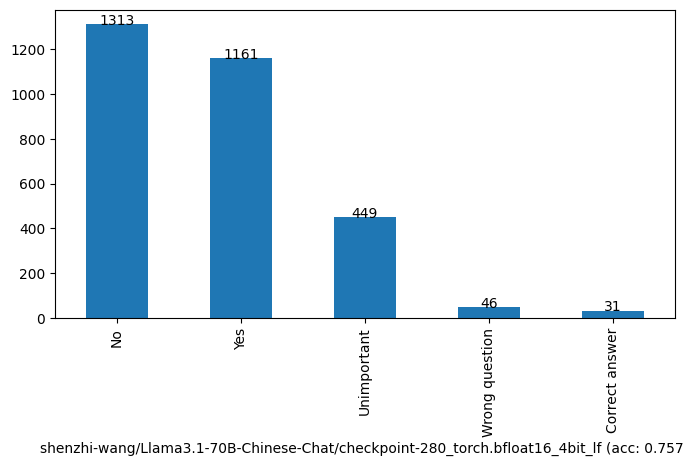

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf
不是      1314
是       1148
不重要      470
问法错误      37
回答正确      31
Name: count, dtype: int64


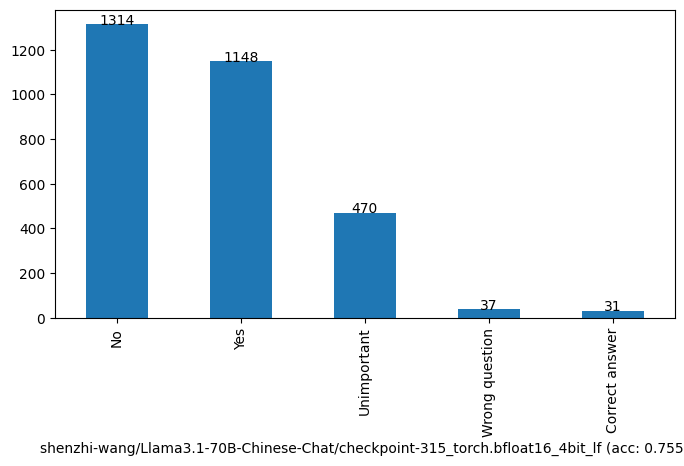

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf
不是      1286
是       1153
不重要      489
问法错误      40
回答正确      32
Name: count, dtype: int64


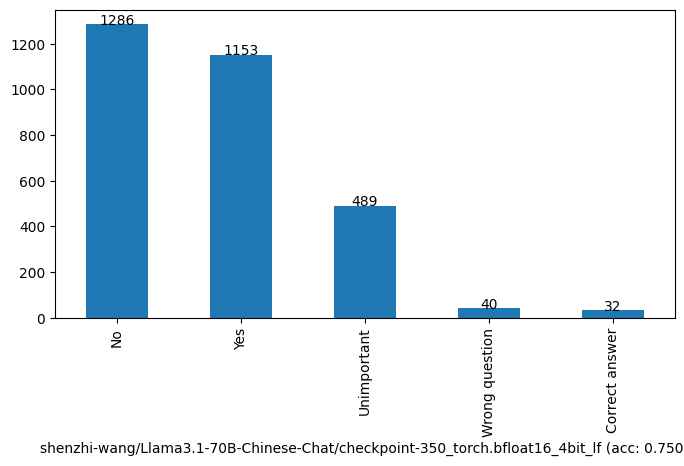

In [49]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat_torch.bfloat16_4bit_lf
不是。      1961
是。        895
问法错误。      73
回答正确。      26
不重要        20
不重要。       15
回答正确        5
是           4
是男孩。        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


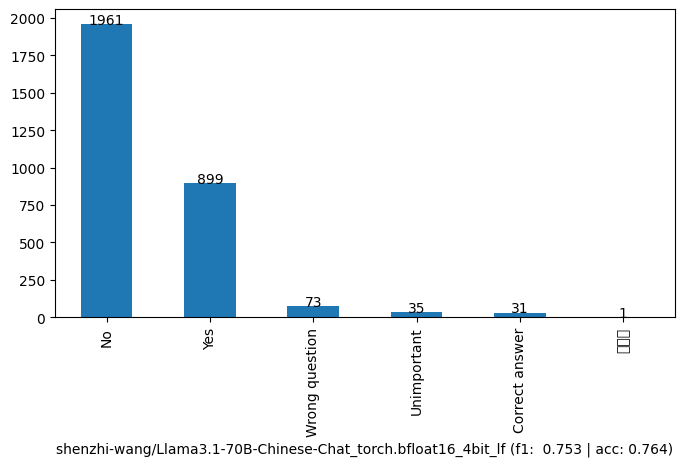

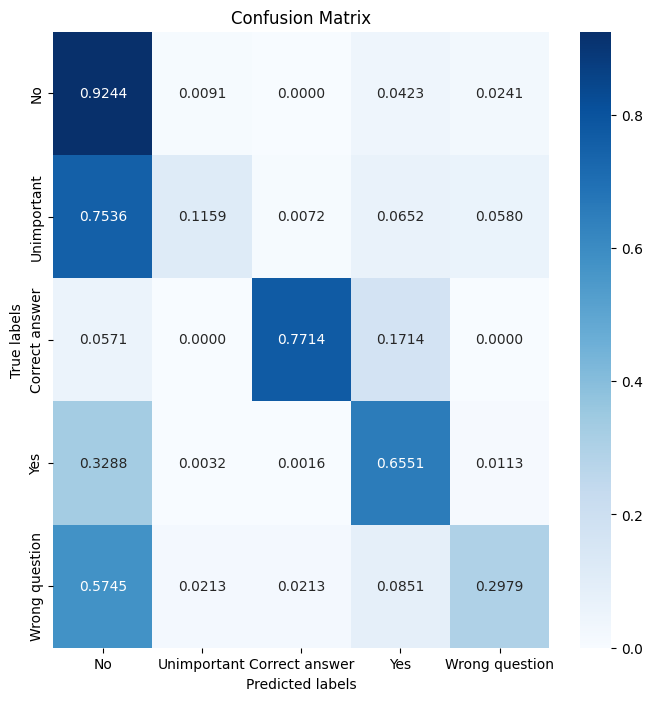

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-35_torch.bfloat16_4bit_lf
不是      1429
是       1180
不重要      339
回答正确      37
问法错误      14
物品         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


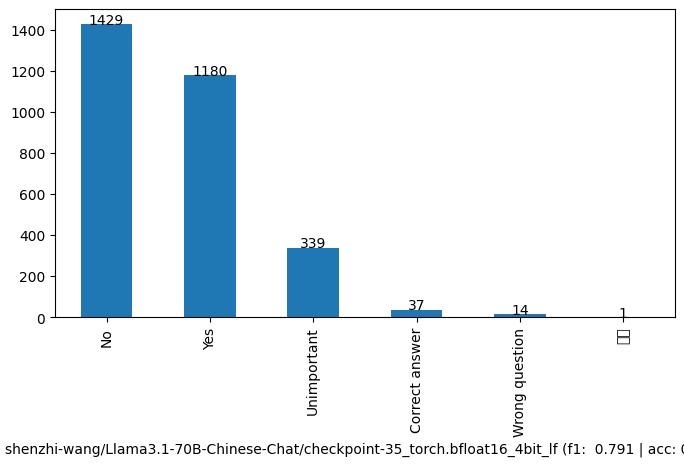

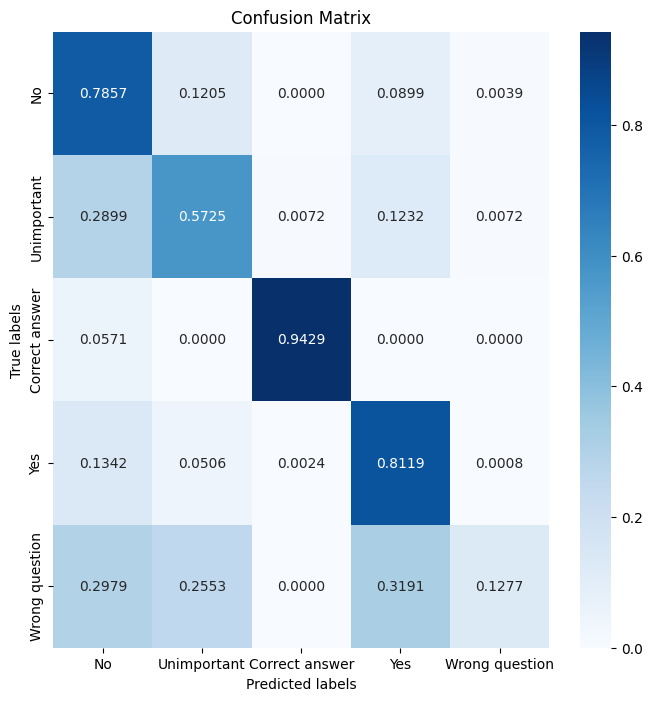

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-70_torch.bfloat16_4bit_lf
不是      1308
是       1099
不重要      512
问法错误      46
回答正确      35
Name: count, dtype: int64


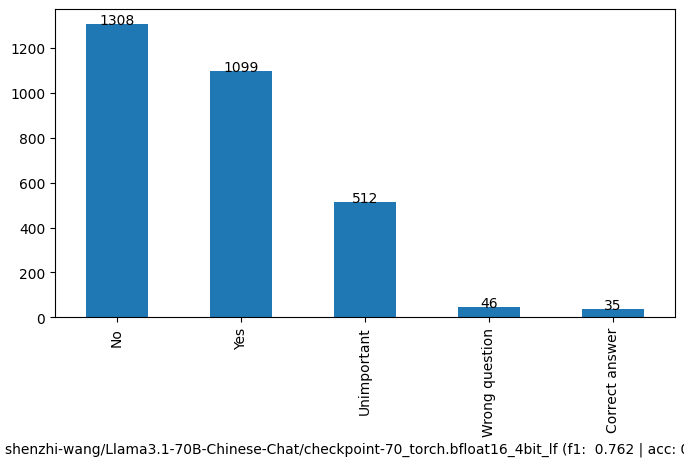

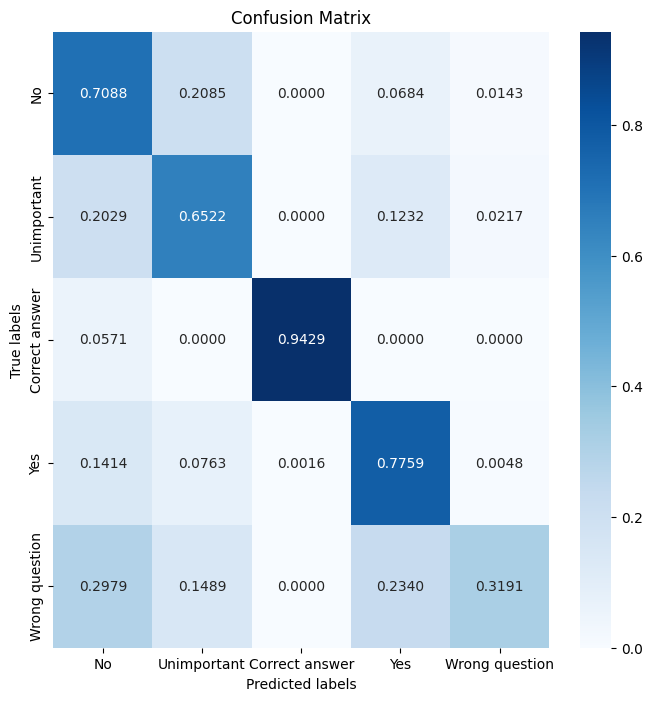

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-105_torch.bfloat16_4bit_lf
不是      1187
是       1152
不重要      562
问法错误      67
回答正确      32
Name: count, dtype: int64


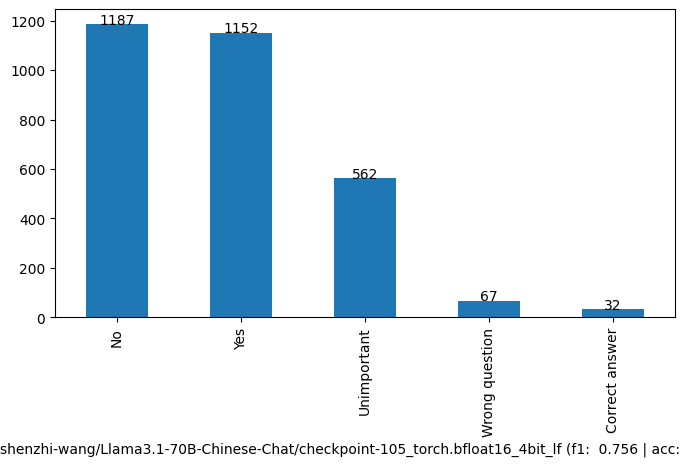

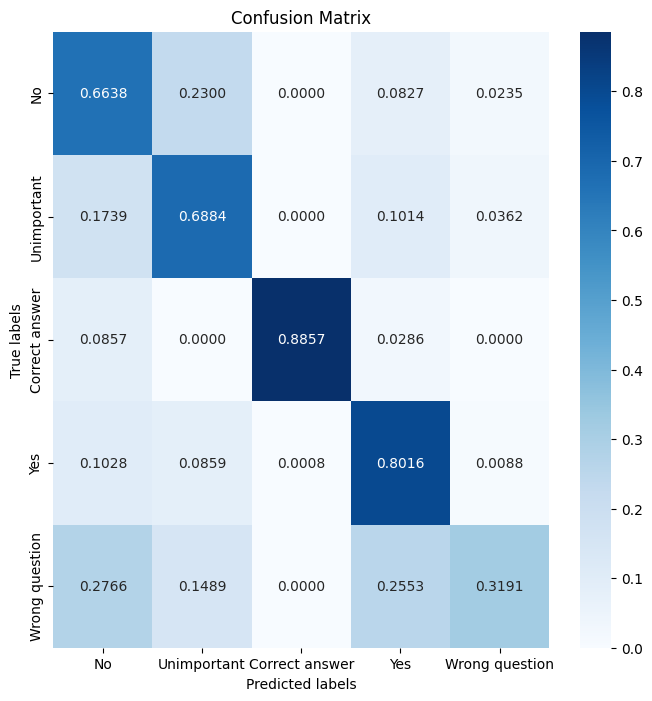

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-140_torch.bfloat16_4bit_lf
是       1245
不是      1237
不重要      446
问法错误      43
回答正确      29
Name: count, dtype: int64


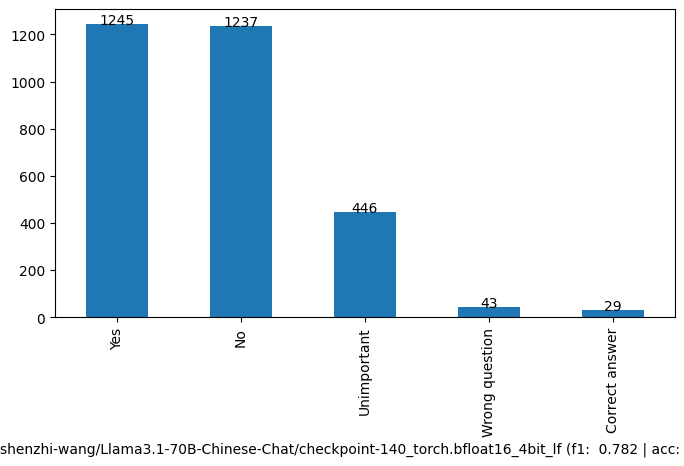

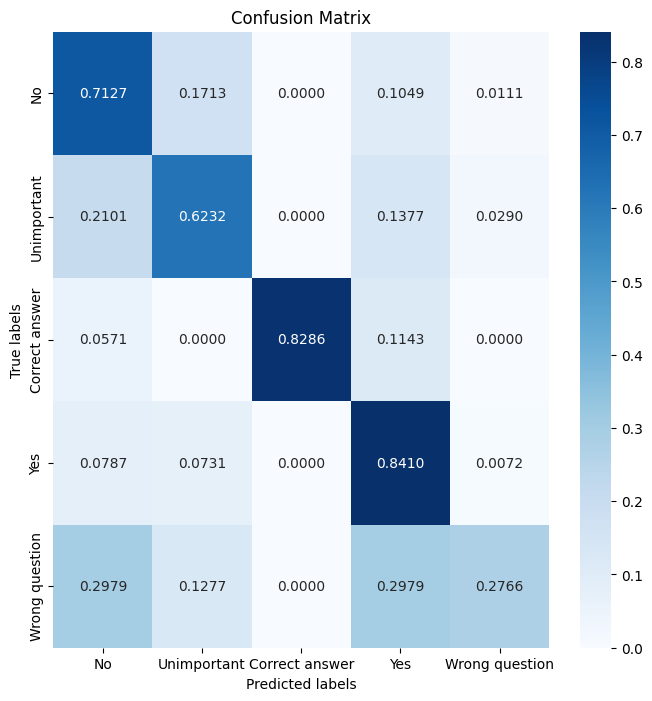

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf
不是      1443
是       1188
不重要      283
问法错误      50
回答正确      36
Name: count, dtype: int64


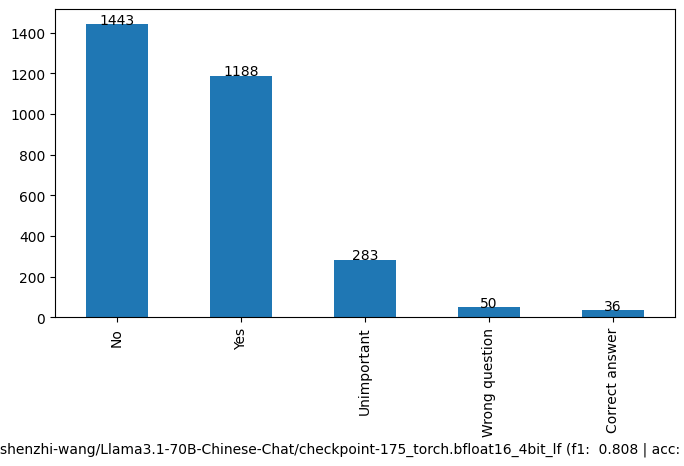

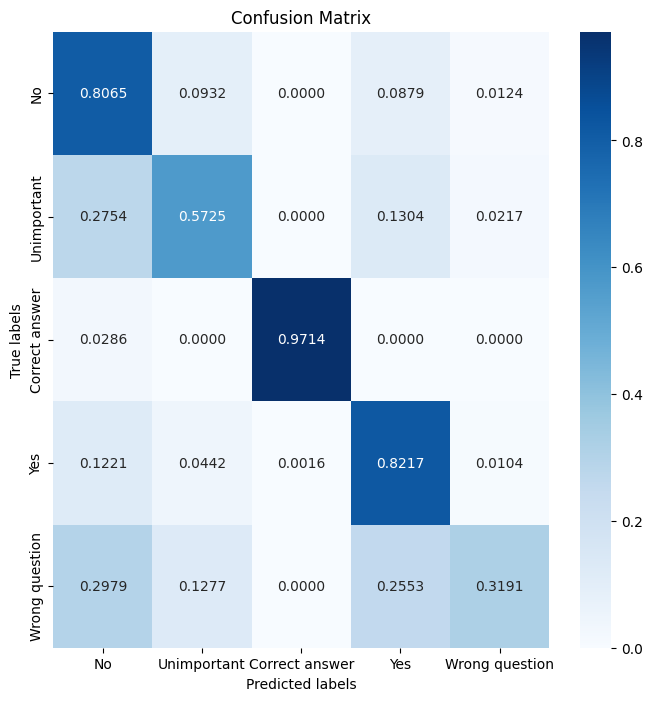

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210_torch.bfloat16_4bit_lf
是       1246
不是      1137
不重要      514
问法错误      68
回答正确      35
Name: count, dtype: int64


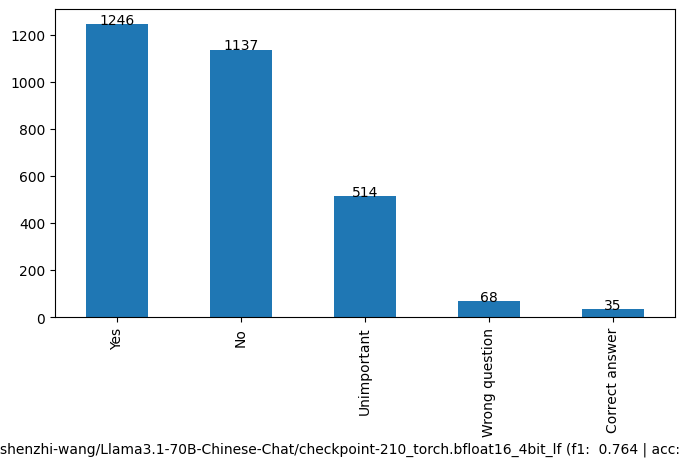

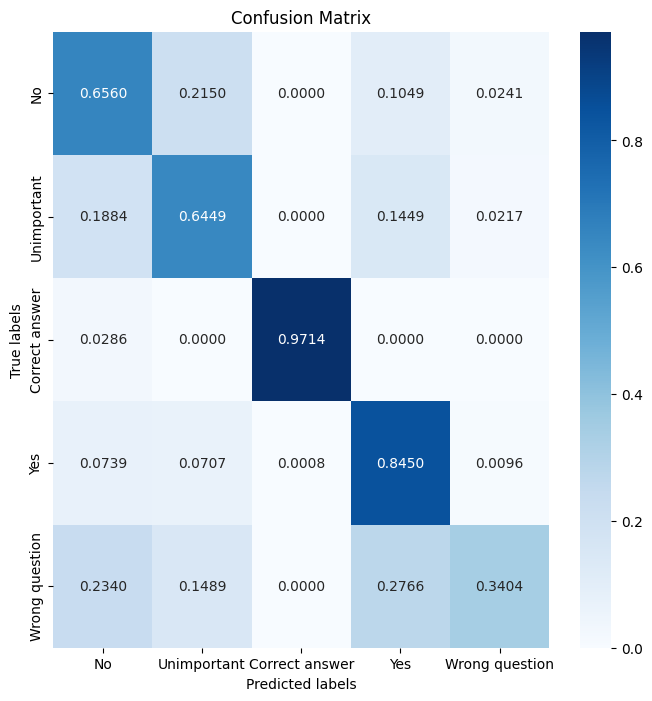

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-245_torch.bfloat16_4bit_lf
不是      1312
是       1162
不重要      463
问法错误      33
回答正确      30
Name: count, dtype: int64


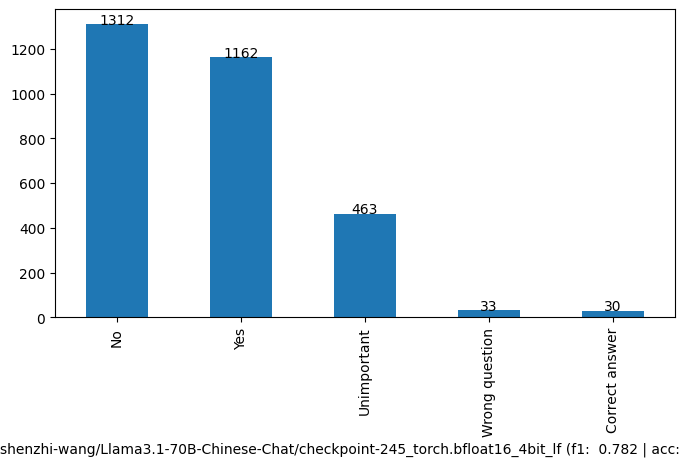

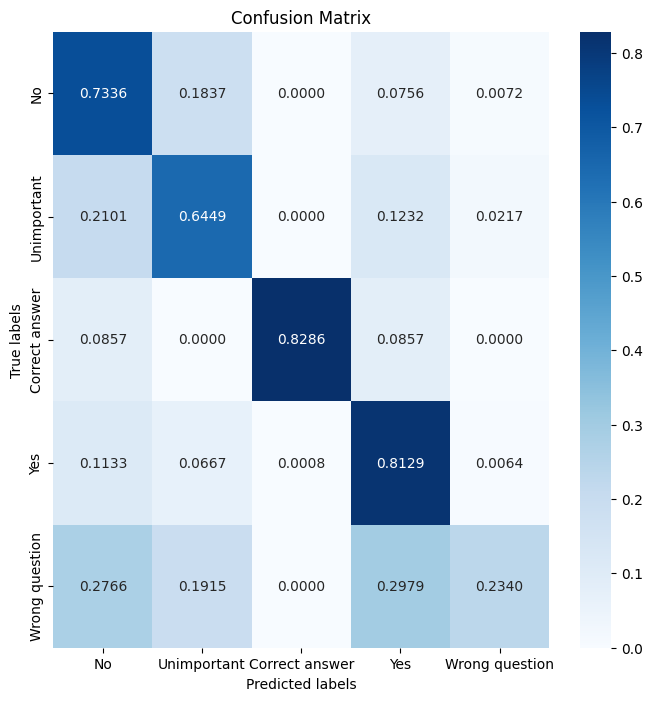

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-280_torch.bfloat16_4bit_lf
不是      1313
是       1161
不重要      449
问法错误      46
回答正确      31
Name: count, dtype: int64


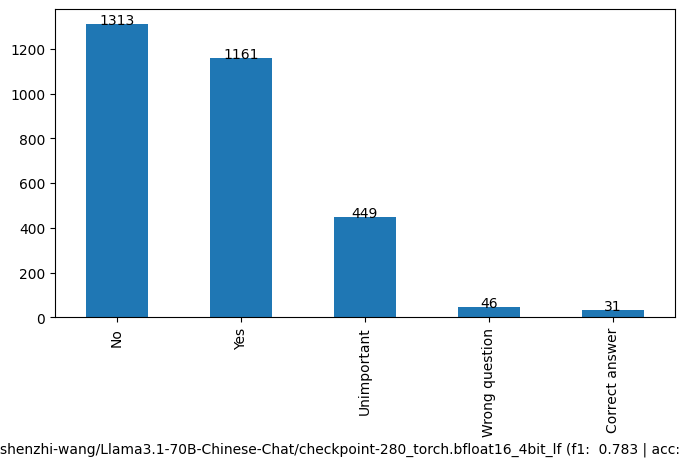

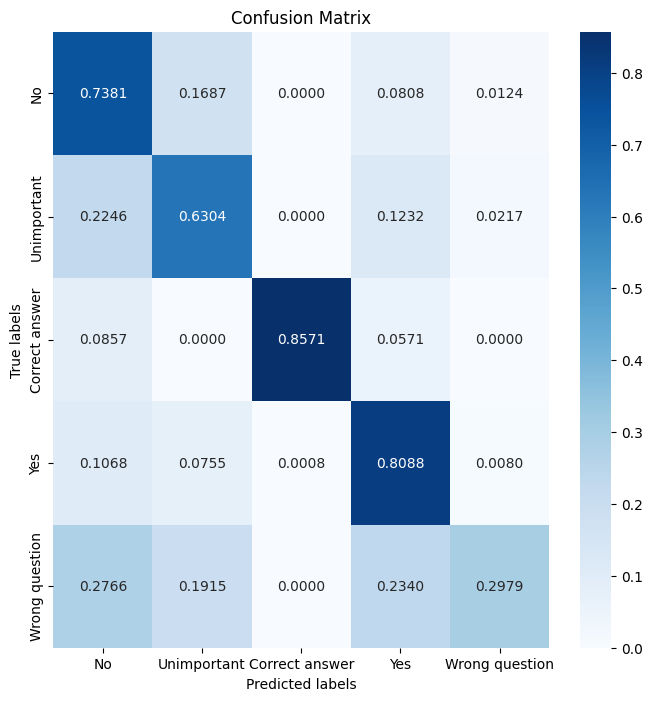

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-315_torch.bfloat16_4bit_lf
不是      1314
是       1148
不重要      470
问法错误      37
回答正确      31
Name: count, dtype: int64


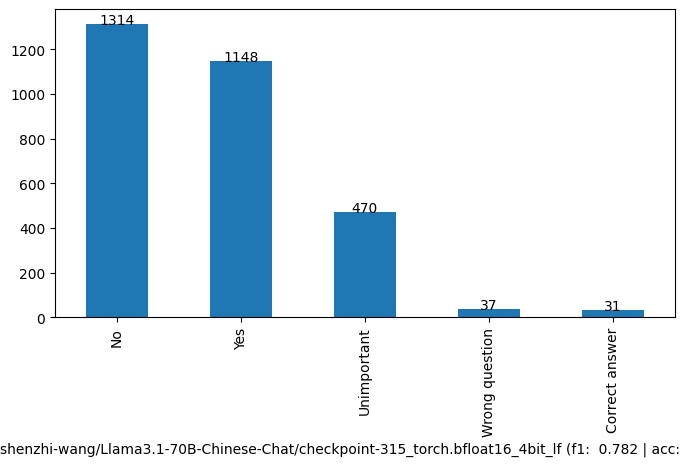

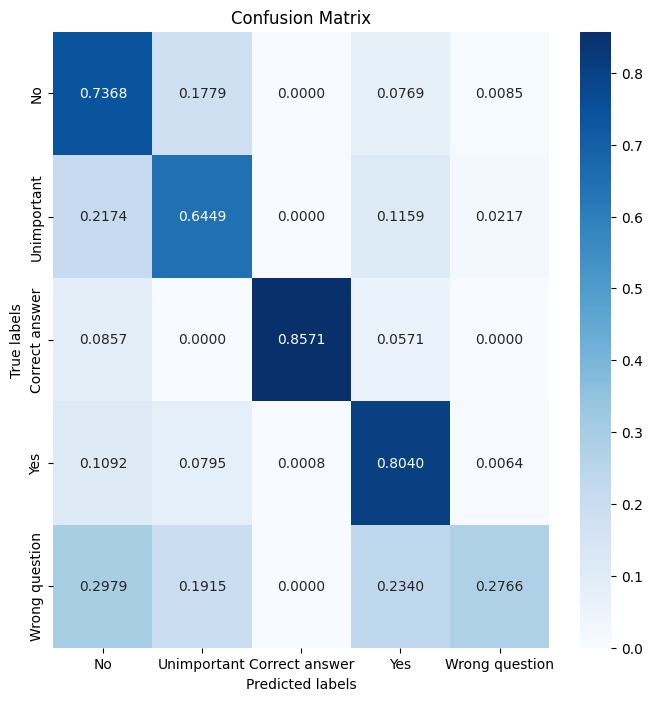

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-350_torch.bfloat16_4bit_lf
不是      1286
是       1153
不重要      489
问法错误      40
回答正确      32
Name: count, dtype: int64


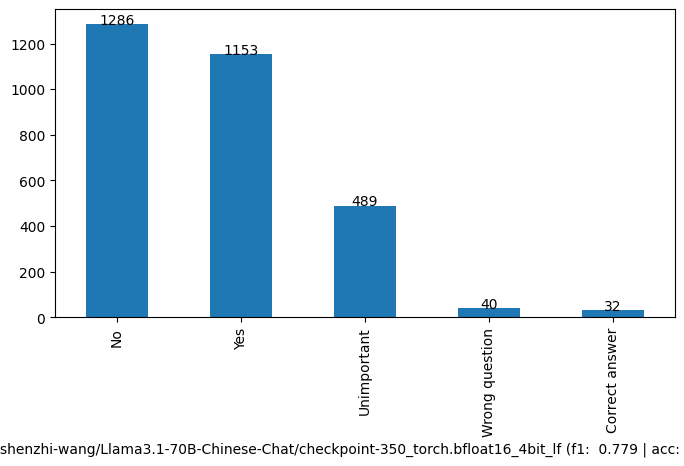

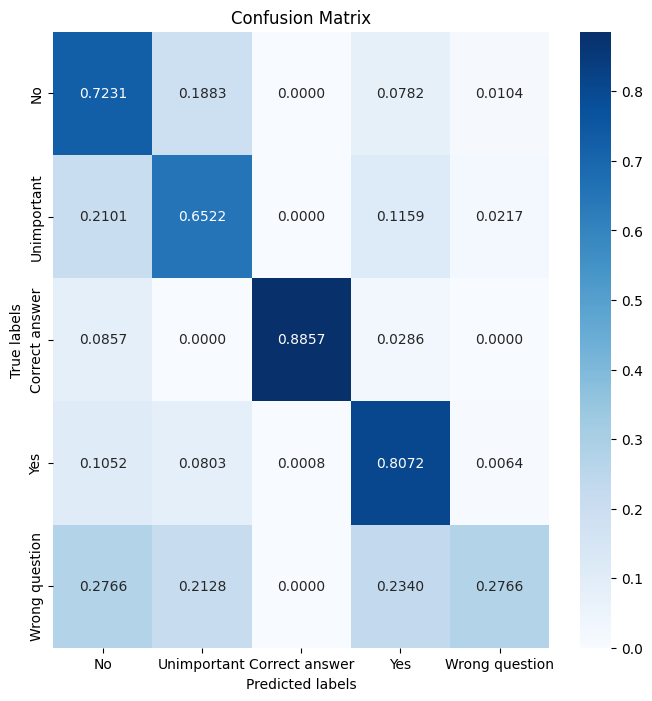

In [50]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00 **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00
不是。      1961
是。        895
问法错误。      73
回答正确。      26
不重要        20
不重要。       15
回答正确        5
是           4
是男孩。        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


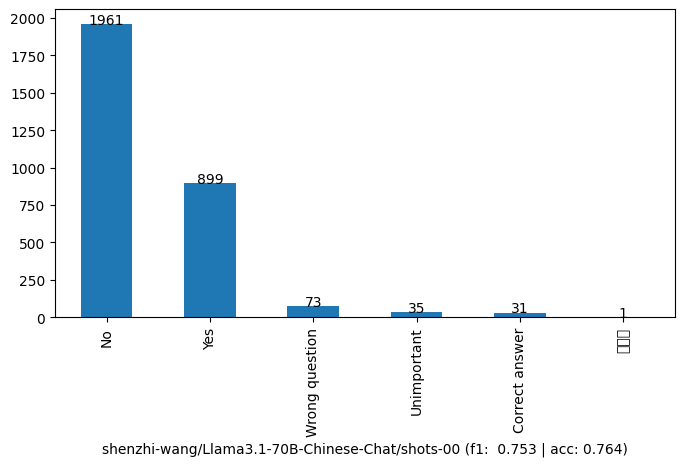

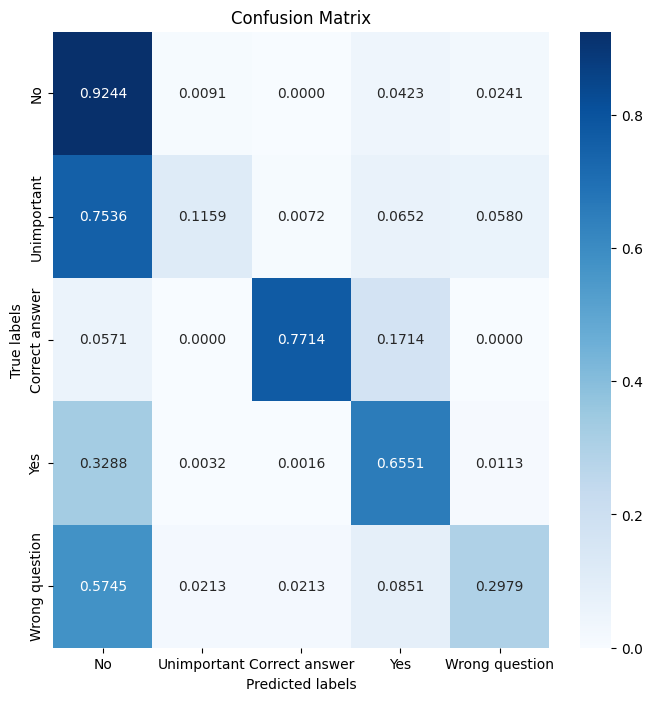

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05 **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05
不是      1161
是        969
不是。      623
不重要      193
回答正确      29
问法错误      18
物品         1
是男孩        1
是男孩。       1
男          1
是男的。       1
是。         1
是男生。       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

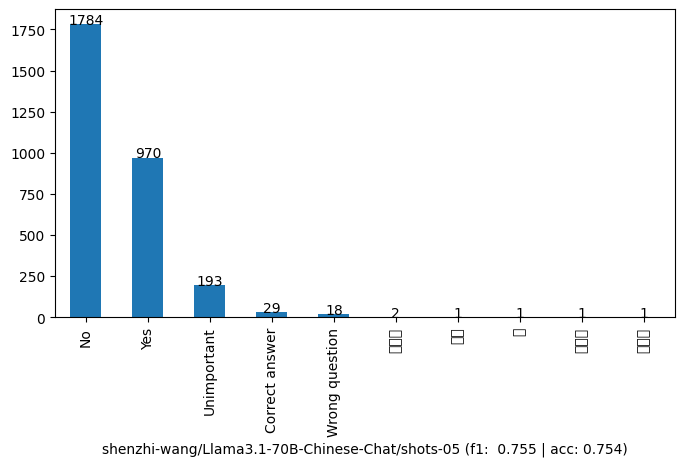

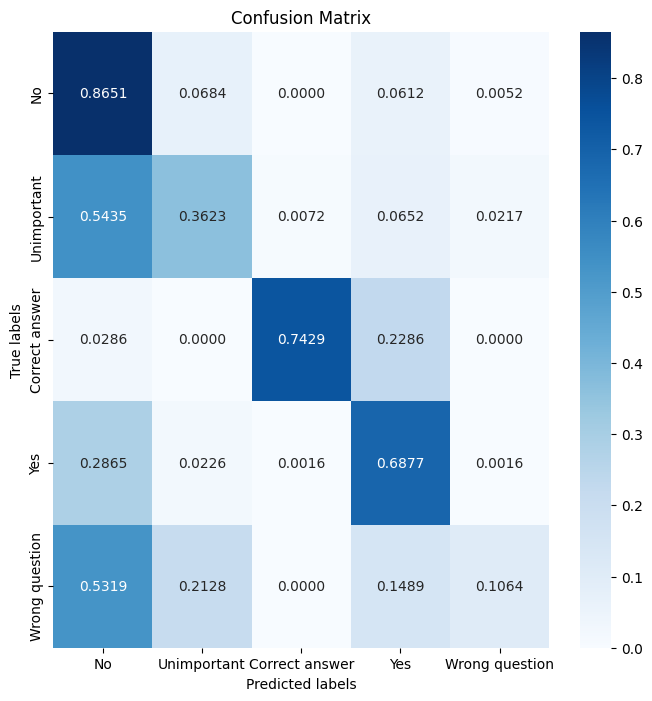

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10 **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10
不是        1262
是          977
不是。        492
不重要        179
问法错误        41
回答正确        39
物品           2
中毒而亡         1
是男孩。         1
是男孩          1
男            1
是男的。         1
是小男孩的。       1
是。           1
是男生。         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

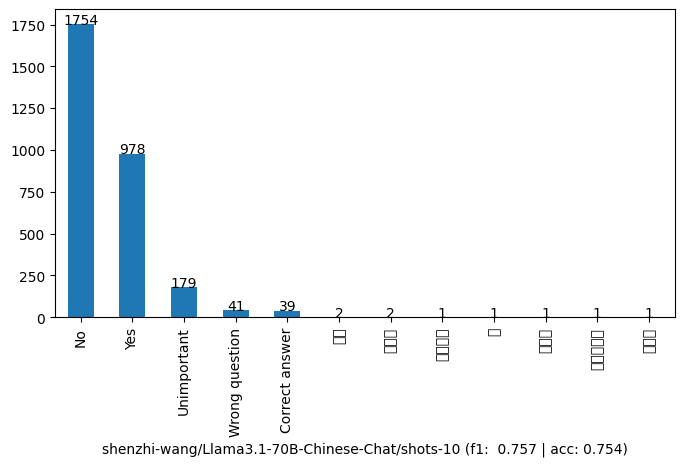

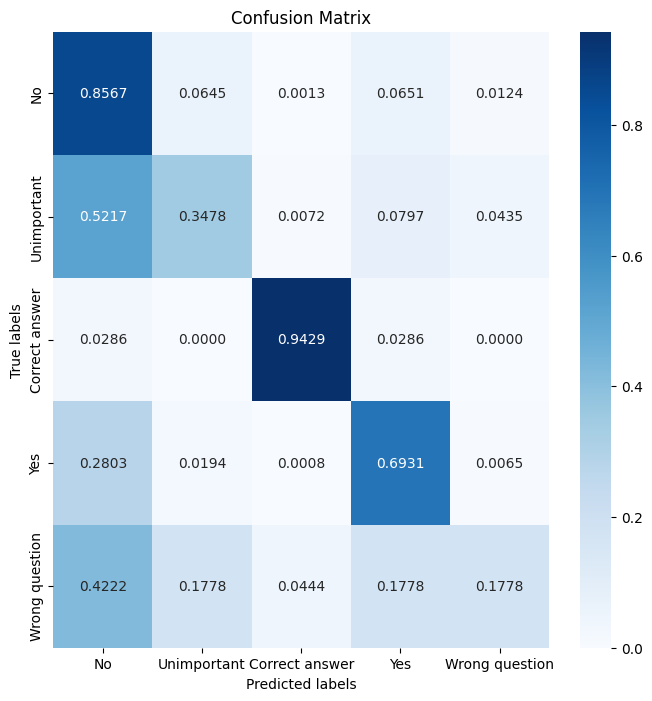

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-20 **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-20
不是                                       1327
是                                         897
不是。                                       536
不重要                                       150
回答正确                                       50
问法错误                                       33
物品                                          2
是小男孩的。                                      2
是男孩                                         1
很抱歉，我无法理解您的提问。请您提出一个封闭式问题，我将根据游戏规则回答。       1
男                                           1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

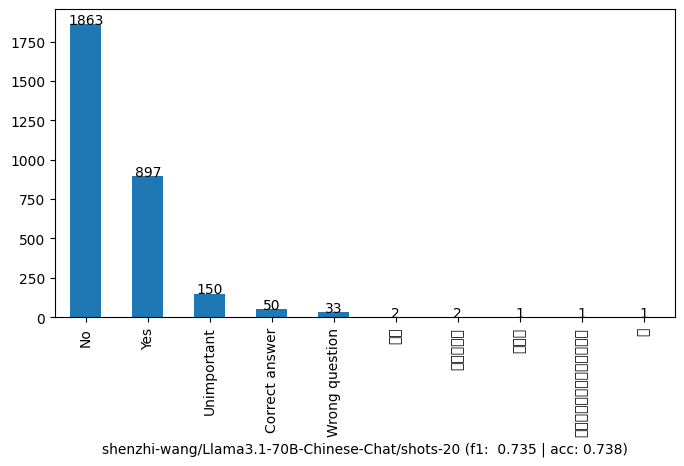

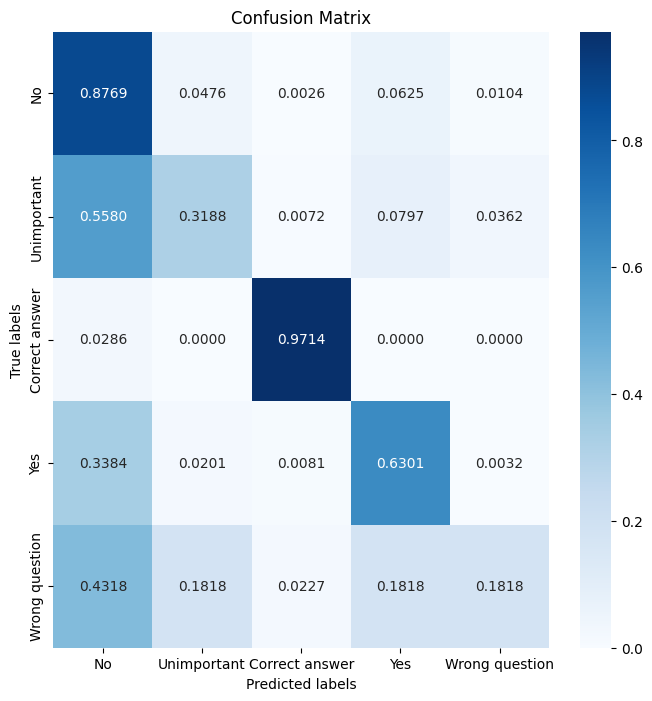

********** shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-30 **********
shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-30
不是。                                        1339
是                                           951
不是                                          473
不重要                                         161
回答正确                                         38
问法错误                                         21
不重要。                                         10
是。                                            2
物品                                            1
很抱歉，我无法理解您的问题。请您重新提问。                         1
很抱歉，我无法理解您的提问。请您提出一个封闭式问题。                    1
很抱歉，我无法理解您的提问。请您提出一个封闭式问题，我会根据游戏规则给出回答。       1
问法错误。                                         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25265 (\N{CJK UNIFIED IDEOGRAPH-62B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27465 (\N{CJK UNIFIED IDEOGRAPH-6B49}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logi

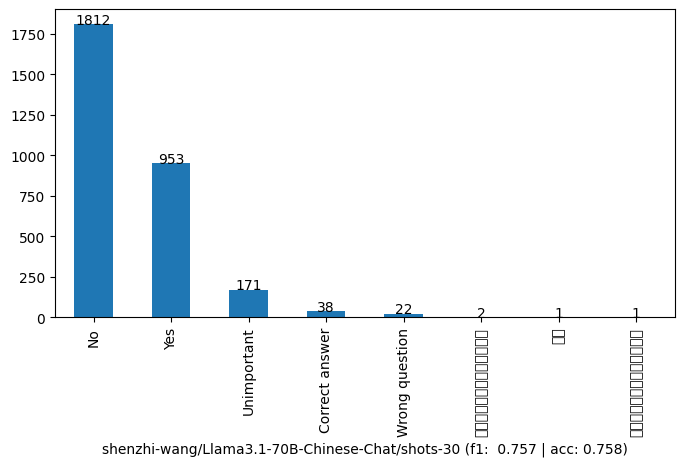

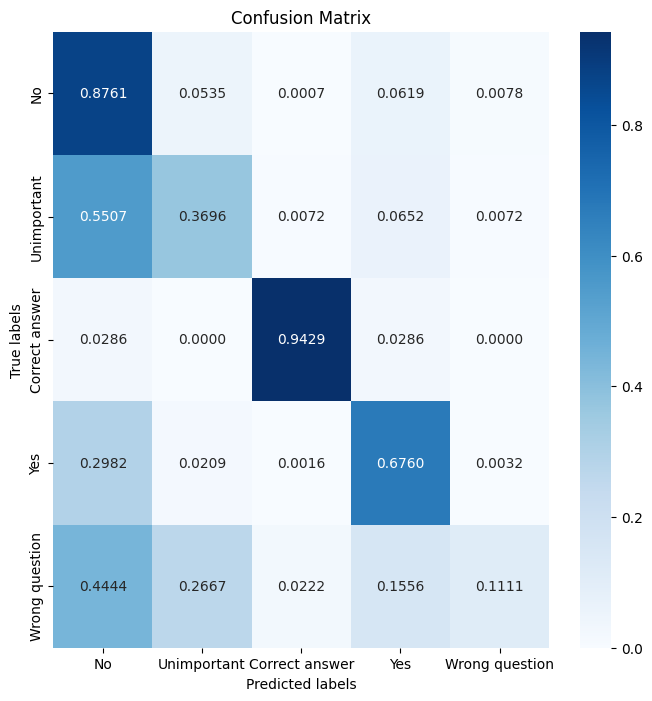

In [51]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )